In [3]:
# packages

import importlib_resources
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.linalg import svd
from itertools import combinations
import xlrd

import os
os.chdir(os.path.abspath(''))

In [27]:
filename = 'Raisin_Dataset.xls'
doc = xlrd.open_workbook(filename).sheet_by_index(0)


attributeNames = doc.row_values(0, 0, 7)

classLabels = doc.col_values(7, 1, 901)
classNames = sorted(set(classLabels))
classDict = dict(zip(classNames, range(len(classNames))))

# Extract vector y, convert to NumPy array
y = np.asarray([classDict[value] for value in classLabels])

# Preallocate memory, then extract excel data to matrix X
X = np.empty((900, 7))
for i, col_id in enumerate(range(0, 7)):
    X[:, i] = np.asarray(doc.col_values(col_id, 1, 901))

# Compute values of N, M and C
N = len(y)
M = len(attributeNames)
C = len(classNames)

print(f'matrix size: {N} by {M}')
print(attributeNames)
print(classNames)


matrix size: 900 by 7
['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea', 'Extent', 'Perimeter']
['Besni', 'Kecimen']


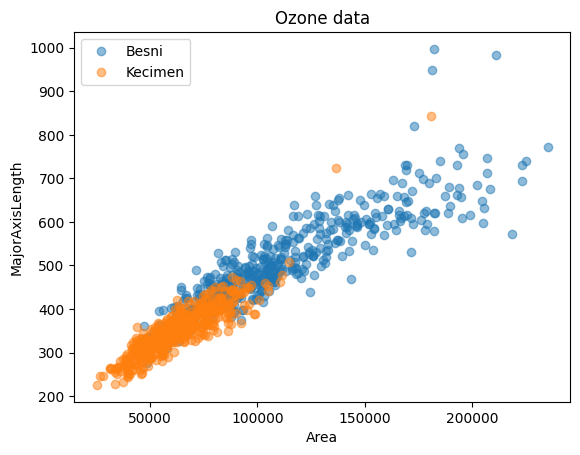

In [28]:
# from ex 2_1_2

i = 0
j = 1

f = plt.figure()
plt.title("Ozone data")

for c in range(C):
    # select indices belonging to class c:
    class_mask = y == c
    plt.plot(X[class_mask, i], X[class_mask, j], "o", alpha=0.5)

plt.legend(classNames)
plt.xlabel(attributeNames[i])
plt.ylabel(attributeNames[j])
plt.show()

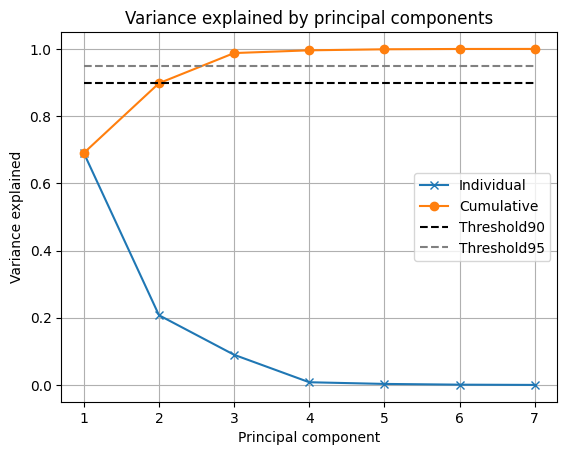

In [29]:
# from exercise 2.1.3

Y = X - np.ones((N, 1)) * X.mean(axis=0)
Y = Y * (1 / np.std(Y, 0))              # important to divide by the stanrdard deviation

U, S, Vh = svd(Y, full_matrices=False)

rho = (S * S) / (S * S).sum()

threshold = 0.9
threshold2 = 0.95

# Plot variance explained
plt.figure()
plt.plot(range(1, len(rho) + 1), rho, "x-")
plt.plot(range(1, len(rho) + 1), np.cumsum(rho), "o-")
plt.plot([1, len(rho)], [threshold, threshold], "k--")
plt.plot([1, len(rho)], [threshold2, threshold2], color="gray", linestyle="--")
plt.title("Variance explained by principal components")
plt.xlabel("Principal component")
plt.ylabel("Variance explained")
plt.legend(["Individual", "Cumulative", "Threshold90","Threshold95"])
plt.grid()
plt.show()




6300


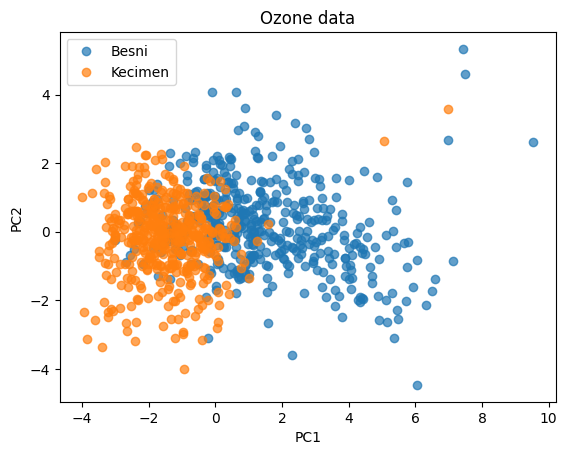

In [30]:
# from exercise 2.1.4

V = Vh.T

Z = Y @ V

i = 0
j = 1

print(Z.size)

# Plot PCA of the data
f = plt.figure()
plt.title("Ozone data")
# Z = array(Z)
for c in range(C):
    # select indices belonging to class c:
    class_mask = y == c
    plt.plot(Z[class_mask, i], Z[class_mask, j], "o", alpha=0.7)
plt.legend(classNames)
plt.xlabel("PC{0}".format(i + 1))
plt.ylabel("PC{0}".format(j + 1))

# Output result to screen
plt.show()



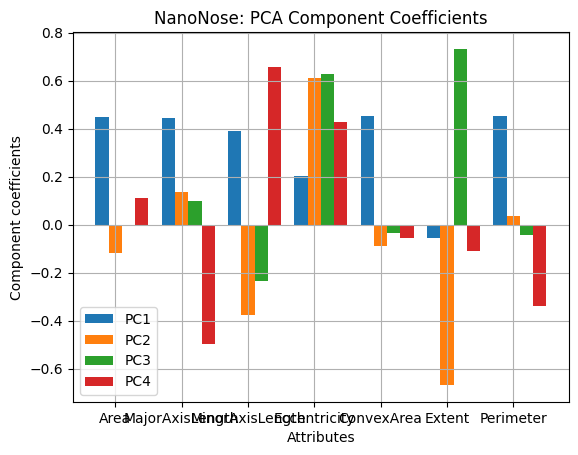

PC2:
Area [-0.11609991]
MajorAxisLength [0.13658724]
MinorAxisLength [-0.37492246]
Eccentricity [0.61082321]
ConvexArea [-0.08761633]
Extent [-0.66734439]
Perimeter [0.03417227]



In [32]:
# from exercise 2.2.4

pcs = [0, 1, 2, 3]
legendStrs = ["PC" + str(e + 1) for e in pcs]
c = ["r", "g", "b"]
bw = 0.2
r = np.arange(1, M + 1)
for i in pcs:
    plt.bar(r + i * bw, V[:, i], width=bw)
plt.xticks(r + bw, attributeNames)
plt.xlabel("Attributes")
plt.ylabel("Component coefficients")
plt.legend(legendStrs)
plt.grid()
plt.title("NanoNose: PCA Component Coefficients")
plt.show()

index = 1
print(f"PC{index+1}:")
for i in range(len(attributeNames)):
    print(attributeNames[i], V[[i], index])
print('')




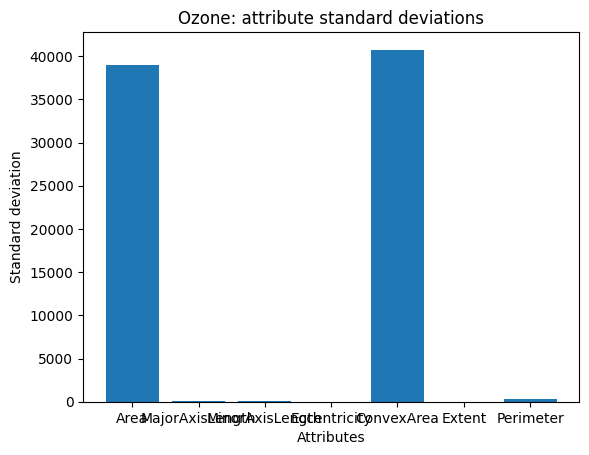

In [33]:
# from ex 2_1_6

r = np.arange(1, X.shape[1] + 1)
plt.bar(r, np.std(X, 0))
plt.xticks(r, attributeNames)
plt.ylabel("Standard deviation")
plt.xlabel("Attributes")
plt.title("Ozone: attribute standard deviations")
plt.show()